In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m


image 1/1 /content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/image_2024-05-24_16-01-23_png.rf.28a4db1641e0926b5ae0013dc04a0b0e.jpg: 640x640 1 1c, 1 1e, 2 20cs, 3 2cs, 2 50cs, 465.1ms
Speed: 11.8ms preprocess, 465.1ms inference, 1831.8ms postprocess per image at shape (1, 3, 640, 640)


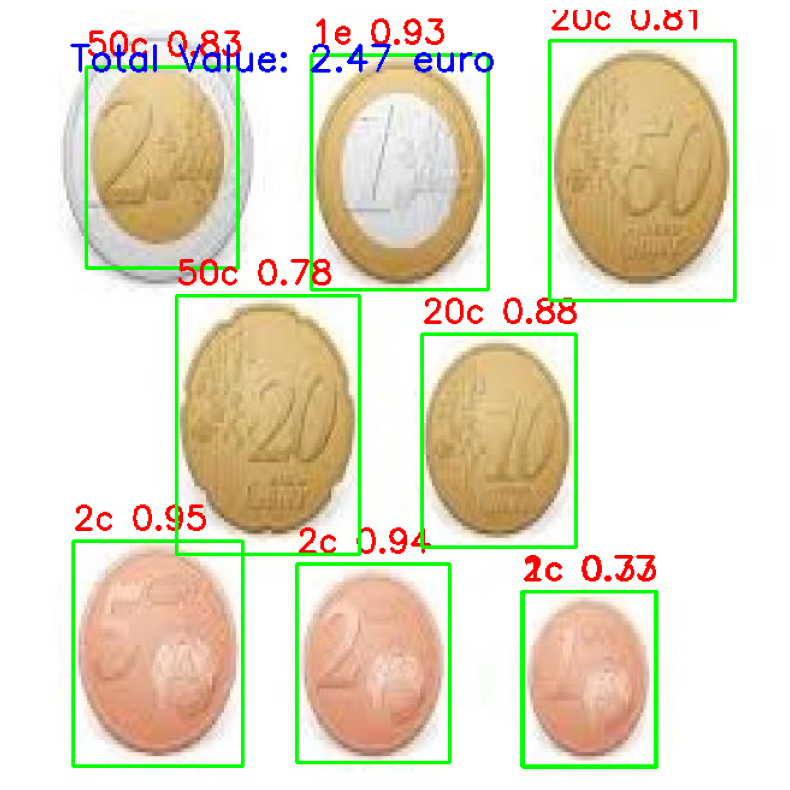

Class Names: {0: '10c', 1: '1c', 2: '1e', 3: '20c', 4: '2c', 5: '2e', 6: '50c', 7: '5c'}


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2


model = YOLO("/content/gdrive/My Drive/Università/coin detection_s/runs/detect/train/weights/best.pt")


path = r'/content/gdrive/My Drive/Università/coin detection_s/dataset/test/images/3_jpg.rf.3f6a5fbf795885fa731e9c7ff77fe8f9.jpg'
results = model(path)


image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0


for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        value = class_values[class_name]
        total_value += value
        label = f'{class_name} {confidence:.2f}'


        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


total_label = f'Total Value: {total_value:.2f}' + ' euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)


plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Class Names:", results[0].names)